# **Spam Message Classification**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Spam Message Classification/spam.tsv', sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


## **1. Data Preprocessing**

In [7]:
df.isna().sum()

,0
label,0
message,0
length,0
punct,0


In [8]:
df['label'].value_counts() / (len(df)) * 100

,count
label,
ham,86.593683
spam,13.406317


In [9]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [10]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [11]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [12]:
# taking randomly rows in ham datapoints that is equal to spam datapoints
ham = ham.sample(spam.shape[0])

In [13]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [14]:
# combining the 2 datasets i.e., ham and spam

# Method 1- Appending spam data into ham data or vice-versa
#data = ham.append(spam, ignore_index=True)

# Method 2- Concatenating the 2 datasets
data = pd.concat([ham, spam], ignore_index=True)

In [15]:
data.shape

(1494, 4)

In [16]:
data['label'].value_counts()

,count
label,
ham,747
spam,747


In [17]:
data.head(50)

,label,message,length,punct
0,ham,Call me when u're done...,25,4
1,ham,Check with nuerologist.,23,1
2,ham,Great. Hope you are using your connections fro...,122,1
3,ham,Can you do a mag meeting this avo at some point?,48,1
4,ham,This single single answers are we fighting? Pl...,84,1
5,ham,Stupid auto correct on my phone,31,0
6,ham,Give me a sec to think think about it,37,0
7,ham,Perhaps * is much easy give your account ident...,82,2
8,ham,Both :) i shoot big loads so get ready!,39,3
9,ham,"Come to me right now, Ahmad",27,1


In [18]:
data.tail(50)

,label,message,length,punct
1444,spam,Get your garden ready for summer with a FREE s...,155,4
1445,spam,Congrats 2 mobile 3G Videophones R yours. call...,160,9
1446,spam,SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...,119,5
1447,spam,ree entry in 2 a weekly comp for a chance to w...,142,6
1448,spam,Our records indicate u maybe entitled to 5000 ...,156,2
1449,spam,Spook up your mob with a Halloween collection ...,150,3
1450,spam,Call Germany for only 1 pence per minute! Call...,151,7
1451,spam,YOU VE WON! Your 4* Costa Del Sol Holiday or £...,162,12
1452,spam,Had your mobile 11mths ? Update for FREE to Or...,160,3
1453,spam,Natalja (25/F) is inviting you to be her frien...,136,12


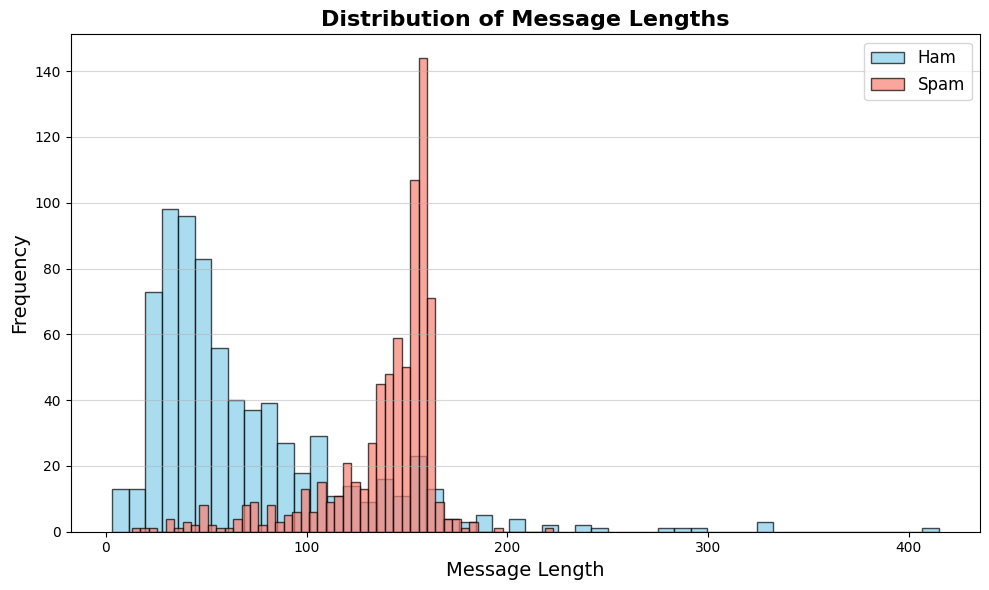

In [19]:
# Sample code to plot histograms for 'ham' and 'spam' message lengths
plt.figure(figsize=(10, 6))  # Set the figure size

# Histogram for 'ham'
plt.hist(
    data[data['label'] == 'ham']['length'],
    bins=50,
    alpha=0.7,
    label='Ham',
    color='skyblue',
    edgecolor='black'
)

# Histogram for 'spam'
plt.hist(
    data[data['label'] == 'spam']['length'],
    bins=50,
    alpha=0.7,
    label='Spam',
    color='salmon',
    edgecolor='black'
)

# Adding a title, labels, and legend
plt.title('Distribution of Message Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Message Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', alpha=0.5)  # Add gridlines for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

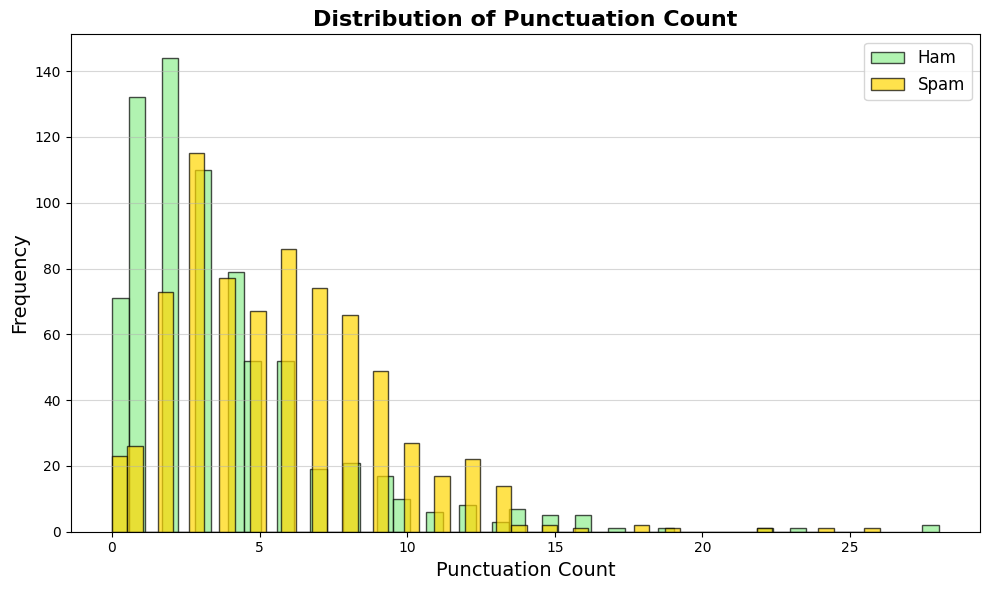

In [20]:
# Sample code to plot histograms for punctuation counts in 'ham' and 'spam'
plt.figure(figsize=(10, 6))  # Set the figure size

# Histogram for 'ham'
plt.hist(
    data[data['label'] == 'ham']['punct'],
    bins=50,
    alpha=0.7,
    label='Ham',
    color='lightgreen',
    edgecolor='black'
)

# Histogram for 'spam'
plt.hist(
    data[data['label'] == 'spam']['punct'],
    bins=50,
    alpha=0.7,
    label='Spam',
    color='gold',
    edgecolor='black'
)

# Adding a title, labels, and legend
plt.title('Distribution of Punctuation Count', fontsize=16, fontweight='bold')
plt.xlabel('Punctuation Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', alpha=0.5)  # Add gridlines for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [21]:
data

,label,message,length,punct
0,ham,Call me when u're done...,25,4
1,ham,Check with nuerologist.,23,1
2,ham,Great. Hope you are using your connections fro...,122,1
3,ham,Can you do a mag meeting this avo at some point?,48,1
4,ham,This single single answers are we fighting? Pl...,84,1
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


## **2. Splitting the dataset**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state = 0, shuffle = True)

In [24]:
X_train.shape

(1045,)

In [25]:
X_test.shape

(449,)

## **3. Model Training**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#### **3.1. Naive Bayes Classifier**

In [27]:
# Naive Bayes Classifier
NB_classifier = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("classifier", MultinomialNB())
])

In [28]:
# Train the classifier
NB_classifier.fit(X_train, y_train)

# Predicting the results (Naive Bayes)
y_pred_NB = NB_classifier.predict(X_test)

In [29]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_NB))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_NB))
print("Classification Report:\n", classification_report(y_test, y_pred_NB))

Accuracy: 0.9621380846325167
Confusion Matrix:
 [[218   9]
 [  8 214]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      0.96      0.96       227
        spam       0.96      0.96      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



#### **3.2. Logistic Regression**

In [30]:
# Logistic Regression Classifier
LG_classifier = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [31]:
# Train the classifier
LG_classifier.fit(X_train, y_train)

# Predicting the results (Logistic Regression)
y_pred_LG = LG_classifier.predict(X_test)

In [32]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_LG))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_LG))
print("Classification Report:\n", classification_report(y_test, y_pred_LG))

Accuracy: 0.9665924276169265
Confusion Matrix:
 [[222   5]
 [ 10 212]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      0.98      0.97       227
        spam       0.98      0.95      0.97       222

    accuracy                           0.97       449
   macro avg       0.97      0.97      0.97       449
weighted avg       0.97      0.97      0.97       449



#### **3.3. Decision Trees**

In [33]:
# Decision Tree Classifier
DT_classifier = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("classifier", DecisionTreeClassifier())
])

In [34]:
# Train the classifier
DT_classifier.fit(X_train, y_train)

# Predicting the results (Decision Tree)
y_pred_DT = DT_classifier.predict(X_test)

In [35]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_DT))
print("Classification Report:\n", classification_report(y_test, y_pred_DT))

Accuracy: 0.9175946547884187
Confusion Matrix:
 [[221   6]
 [ 31 191]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.88      0.97      0.92       227
        spam       0.97      0.86      0.91       222

    accuracy                           0.92       449
   macro avg       0.92      0.92      0.92       449
weighted avg       0.92      0.92      0.92       449



#### **3.4. Random Forest**

In [36]:
RF_classifier = Pipeline([
    ("tfidf", TfidfVectorizer()) ,
     ("classifier", RandomForestClassifier(n_estimators=100)
)])

In [37]:
# Train the classifier
RF_classifier.fit(X_train, y_train)

# Predicting the results (Decision Tree)
y_pred_RF = RF_classifier.predict(X_test)

In [38]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_RF))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_RF))
print("Classification Report:\n", classification_report(y_test, y_pred_RF))

Accuracy: 0.955456570155902
Confusion Matrix:
 [[227   0]
 [ 20 202]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.92      1.00      0.96       227
        spam       1.00      0.91      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.95      0.96       449
weighted avg       0.96      0.96      0.96       449



## **4. Prediction through the best model**

In [43]:
test1 = ['Hello, I am learning Natural Language Processing']
test2 = ['Hope you are doing good and learning new things!']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']
test4 = ['I want you to buy this product as it is very useful to me.']

In [44]:
print(LG_classifier.predict(test1))
print(LG_classifier.predict(test2))
print(LG_classifier.predict(test3))
print(LG_classifier.predict(test4))

['ham']
['ham']
['spam']
['ham']
